In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [25]:
DATA_PATH = os.path.join("..", "DataSet", "SPU_D.xlsx")
df = pd.read_excel(DATA_PATH)

C:\Users\WIN 10 PRO 22H2\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
df = df[['Content', 'Report time']]

In [27]:
df['Report time'] = pd.to_datetime(df['Report time'])

In [28]:
df['PM2.5'] = df['Content'].str.extract(r'PM2.5:(\d+\.?\d*)').astype(float)
df['CO2'] = df['Content'].str.extract(r'CO2:(\d+\.?\d*)').astype(float)
df['Temp'] = df['Content'].str.extract(r'Temp:(\d+\.?\d*)').astype(float)
df['humid'] = df['Content'].str.extract(r'humid:(\d+\.?\d*)').astype(float)
df['VOC'] = df['Content'].str.extract(r'VOC:(\d+\.?\d*)').astype(float)
df['HCHO'] = df['Content'].str.extract(r'HCHO:(\d+\.?\d*)').astype(float)

In [29]:
df['Date'] = df['Report time'].dt.strftime('%Y-%m-%d')
df['Time'] = df['Report time'].dt.strftime('%H:%M:%S')

In [30]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isnull().sum())

Content        0
Report time    0
PM2.5          0
CO2            0
Temp           0
humid          0
VOC            0
HCHO           0
Date           0
Time           0
dtype: int64


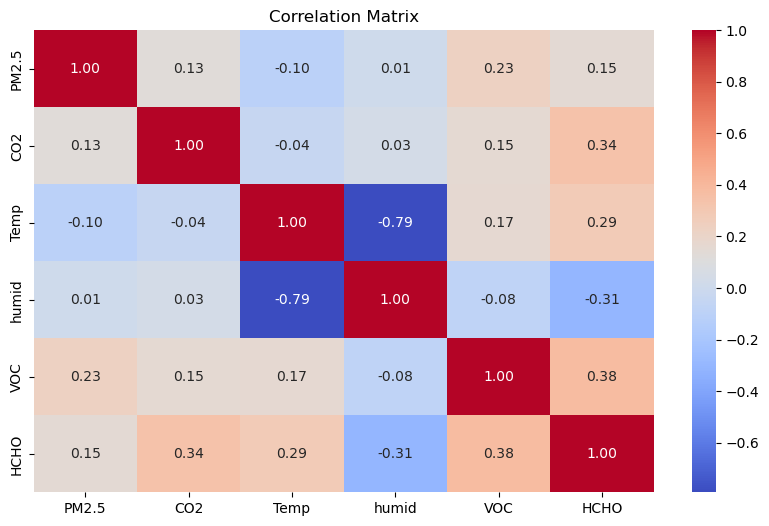

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [32]:
X = df[['PM2.5', 'Temp', 'humid', 'VOC', 'HCHO']]
y = df['CO2']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
dt_best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [36]:
dt_best.fit(X_train_scaled, y_train)

DecisionTreeRegressor(min_samples_split=10, random_state=42)

In [37]:
y_pred = dt_best.predict(X_test_scaled)

In [38]:
# dt = DecisionTreeRegressor(random_state=42)
# dt.fit(X_train_scaled, y_train)

In [39]:
# y_pred = dt.predict(X_test_scaled)

In [40]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}%".format(mse))
print("Mean Absolute Error (MAE): {:.2f}%".format(mae))
print("R-squared (R2): {:.2f}%".format(r2 * 100))

Mean Squared Error (MSE): 100.56%
Mean Absolute Error (MAE): 4.85%
R-squared (R2): 94.59%


C:\Users\WIN 10 PRO 22H2\AppData\Local\Temp\ipykernel_20944\3949141150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


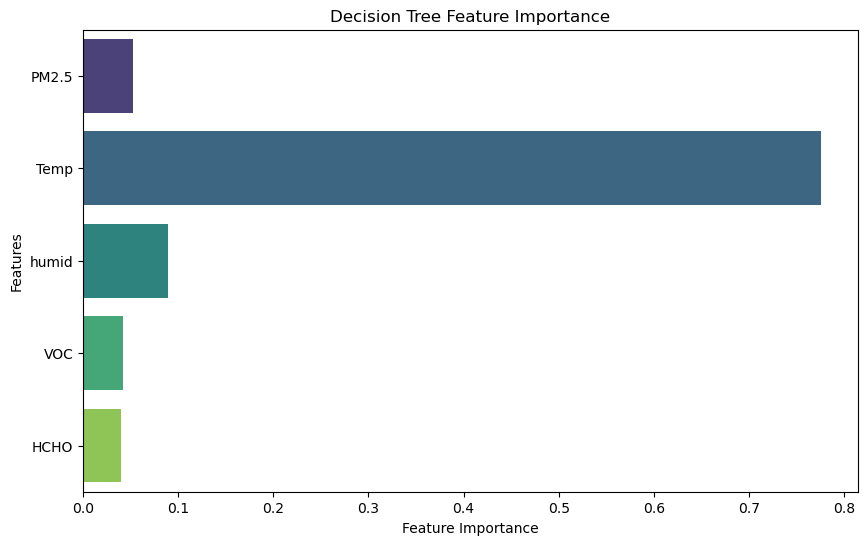

In [41]:
feature_importance = dt_best.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()

In [42]:
# feature_importance = dt.feature_importances_
# feature_names = X.columns

# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Decision Tree Feature Importance")
# plt.show()

In [43]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()